# Main

In [1]:
from ortools.constraint_solver import pywrapcp
from ortools.sat.python import cp_model
import os

In [2]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [25]:
idx = 27
with open(f'./data/{files[idx]}','r') as fp:
    input_data = fp.read()
print(input_data[:15])

50 350
0 3
0 5



In [26]:


lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))
    
print(node_count, edge_count)

50 350


In [27]:
edge_array = np.array(edges)
orders = [np.sum(edge_array==i) for i in range(node_count)]
highest_order = int(np.argmax(orders))
print(highest_order,orders[highest_order] )

45 23


# Constraint Programing


In [28]:
n_points = node_count
n_colors = max(orders)+1

solver = pywrapcp.Solver('Colors')

# colors = [solver.IntVar(0,n_points-1,f'c_{i}') for i in range(n_points)]
colors = [solver.IntVar(0,highest_order-1,f'c_{i}') for i in range(n_points)]
print(n_points,)

50


In [ ]:
for i,j in edges:
    solver.Add(colors[i]!=colors[j])

In [8]:
# solver.Add(colors[highest_order] < 1)
# solver.

In [13]:
mode = 1
if mode ==0:
    
    solver.Minimize(solver.Sum(colors),1)
else:
    max_colors = solver.IntVar(0,highest_order,'max_color')
    solver.Add(colors[highest_order] < 1)
    solver.MaxEquality(colors,max_colors)
    solver.Minimize(max_colors,1)
#     solver.Minimize(solver.Max(colors),1)

# solver.TimeLimit(5000)
db = solver.Phase(colors,
                    solver.CHOOSE_FIRST_UNBOUND,
                    solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)


In [14]:
solver.NextSolution()

False

In [15]:
num_solutions = 0

if solver.NextSolution():
    res = [c.Value() for c in colors]

print(max(*res)+1)
print(*res)

NameError: name 'res' is not defined

In [43]:
    
solver.EndSearch()

In [44]:
print(len(res),res)

70 [0, 1, 1, 2, 2, 3, 3, 4, 5, 4, 5, 6, 7, 8, 6, 6, 5, 7, 0, 9, 8, 6, 8, 10, 0, 2, 10, 9, 11, 9, 12, 2, 12, 4, 10, 13, 1, 0, 14, 11, 3, 15, 16, 3, 13, 1, 9, 16, 11, 11, 17, 14, 17, 15, 13, 7, 12, 18, 5, 16, 19, 19, 20, 21, 18, 18, 15, 15, 21, 22]


In [12]:
def algo(edges,n_points):
    # solver = pywrapcp.Solver('Colors')
    solver = pywrapcp.Solver('Colors')
    colors = [solver.IntVar(0,n_points-1,f'c_{i}') for i in range(n_points)]
    for i,j in edges:
        solver.Add(colors[i]!=colors[j])
    solver.Minimize(solver.Max(colors),1)
    db = solver.Phase(colors,
                        solver.CHOOSE_FIRST_UNBOUND,
                        solver.ASSIGN_MIN_VALUE)
    solver.NewSearch(db)

    if solver.NextSolution():
        return [c.Value() for c in colors]
    else:
        return []

In [13]:

def algo2(edges,n_points):
    solver = pywrapcp.Solver('Colors')
    colors = [solver.IntVar(0,n_points-1,f'c_{i}') for i in range(n_points)]
    
    for i,j in edges:
        solver.Add(colors[i]!=colors[j])
    solver.Minimize(solver.Max(colors),1)
    db = solver.Phase(colors,
                        solver.CHOOSE_FIRST_UNBOUND,
                        solver.ASSIGN_MIN_VALUE)
    solver.NewSearch(db)

    if solver.NextSolution():
        return [c.Value() for c in colors]
    else:
        return []

# Linear Solver

In [1]:
from ortools.linear_solver import pywraplp
import numpy as np
import os

In [2]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [17]:
idx = 26
print(files[idx])
with open(f'./data/{files[idx]}','r') as fp:
    input_data = fp.read()
print(input_data[:15])

gc_50_1
50 133
0 5
0 15


In [4]:
lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))

In [5]:
solver = pywraplp.Solver.CreateSolver('simple_mip_program', 'CBC')

In [6]:
ccnt = np.array(edges).flatten()
n_colors = max(*[len(ccnt[ccnt==i]) for i in range(node_count)])
n_colors = 18#node_count
cmat = [[0]*n_colors]*node_count # node_count x n_colors

In [7]:
# Create the color matrix
for i in range(node_count):
#     for j in range(n_colors):
#         print(f'c_{i}_{j}')
    cmat[i] = [solver.IntVar(0,1,f'c_{i}_{j}') for j in range(n_colors)]

In [8]:

# Assign one color to every node
for i in range(node_count):
    solver.Add(solver.Sum(cmat[i])==1)
#     solver.Add(solver.Sum(cmat[i])>=1)

In [9]:
solver.Add(solver.Sum([cmat[i][0] for i in range(n_colors)])>=1)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000002347DBBB5D0> >

In [10]:
# Neighbor nodes can't have the same color
for n1,n2 in edges:
    for c in range(n_colors):
        solver.Add(cmat[n1][c]+cmat[n2][c]<=1)

In [11]:
col_sums = [solver.Sum([cmat[i][c] for i in range(node_count)]) for c in range(n_colors)]

for c in range(1,n_colors):
    solver.Add(col_sums[c-1]>=col_sums[c])

In [12]:
solver.Minimize(solver.Sum([col_sums[i]*i for i in range(n_colors)]))
# solver.Maximize(solver.Sum([col_sums[i]*col_sums[i] for i in range(n_colors)]))

In [13]:
status = solver.Solve()

In [14]:
status == pywraplp.Solver.OPTIMAL

True

In [15]:
solver.Sum([solver.Sum(cmat[i])*i for i in range(node_count)]).solution_value()

1225.0

In [16]:
for j in range(node_count):
    print(*[cmat[j][i].solution_value() for i in range(n_colors)])

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

# Constraint Prog. 2

In [15]:
from ortools.constraint_solver import pywrapcp
from ortools.sat.python import cp_model
import os

In [16]:
def show_mat(l):
    for row in l:
        print(*row)

In [17]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [18]:
idx = 27
with open(f'./data/{files[idx]}','r') as fp:
    input_data = fp.read()
print(input_data[:15])

50 350
0 3
0 5



In [19]:


lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))

In [20]:
n_points = node_count
n_colors = n_points-1
solver = pywrapcp.Solver('Colors')
colors = [[solver.IntVar(0,1,f'c_{i}_{j}') for j in range(n_colors)] for i in range(n_points)]
print(n_points)

50


In [21]:
for row in colors:
    solver.Add(solver.Sum(row)==1)

In [22]:
# Neighbor nodes can't have the same color
for n1,n2 in edges:
    for c in range(n_colors):
        solver.Add(colors[n1][c]*colors[n2][c]==0)    

In [23]:
col_sums = [solver.Sum([colors[i][c] for i in range(node_count)]) for c in range(n_colors)]
for c in range(1,n_colors):
    solver.Add(col_sums[c-1]>=col_sums[c])

In [24]:
# solver.Minimize(solver.Sum([col_sums[i]*i for i in range(n_colors)]),1)
solver.Maximize(solver.Sum([col_sums[i]*col_sums[i] for i in range(n_colors)]),1)

<ortools.constraint_solver.pywrapcp.OptimizeVar; proxy of <Swig Object of type 'operations_research::OptimizeVar *' at 0x000001F3201D33F0> >

In [25]:
flat_c = [item for sublist in colors for item in sublist]
db = solver.Phase(flat_c,solver.CHOOSE_FIRST_UNBOUND,solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)


In [ ]:
num_solutions = 0

if solver.NextSolution():
    res = []
    for row in colors:
        res.append([c.Value() for c in row])
    print(f'Solution#{num_solutions+1}')
    show_mat(res)
    num_solutions+=1

    
solver.EndSearch()
# print(max(*res)+1)


In [48]:
show_mat(res)

0 0 1
0 1 0
1 0 0
1 0 0


# Sample problems

In [11]:
solver = pywrapcp.Solver('nums') 

In [12]:
x = [solver.IntVar(1,9,f'x_{i}') for i in range(5)]

In [29]:
solver.Add(solver.AllDifferent(x))
for i in range(1,len(x)):
    solver.Add(x[i]<x[i-1])

In [30]:
solver.Add(solver.Sum(x)==20)
solver.Minimize(x[0],1)

<ortools.constraint_solver.pywrapcp.OptimizeVar; proxy of <Swig Object of type 'operations_research::OptimizeVar *' at 0x000002D74F36ADE0> >

In [13]:
db = solver.Phase(x,solver.CHOOSE_FIRST_UNBOUND,solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)
num_solutions = 0

if solver.NextSolution():
    res = [c.Value() for c in x]
    
solver.EndSearch()

In [15]:
x

[x_0(1..9), x_1(1..9), x_2(1..9), x_3(1..9), x_4(1..9)]

# Use Cp_model

In [63]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [64]:
from ortools.sat.python import cp_model
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [65]:
def from_file(index):
    files = os.listdir('./data')
    with open(f'./data/{files[index]}', 'r') as fp:
        input_data = fp.read()
    lines = input_data.split('\n')

    first_line = lines[0].split()
    node_count = int(first_line[0])
    edge_count = int(first_line[1])

    edges = []
    for i in range(1, edge_count + 1):
        line = lines[i]
        parts = line.split()
        edges.append((int(parts[0]), int(parts[1])))

    print(f'File: {files[index]}')
    print(f'Nodes: {node_count}')
    print(f'Edges: {edge_count}')
    return node_count, edge_count, edges


def node_degree(edges, n_nodes=None):
    occur = np.array(edges).flatten()
    if n_nodes is None:
        n_nodes = occur.max()
    return [len(occur[occur == o]) for o in range(n_nodes)]


def visualize(edges, n_nodes=None, colors=None, random_seed=1, mode=0,alpha = 0.5):
    np.random.seed(random_seed)
    plt.figure(figsize=(10, 10))
    if n_nodes is None:
        n_nodes = np.array(edges).max() + 1

    if mode == 0:
        t = np.linspace(0, 1, n_nodes + 1) * 2 * np.pi
        coords = np.c_[np.sin(t[:-1]), np.cos(t[:-1])]
    elif mode == 1:
        coords = np.random.rand(n_nodes, 2)
    else:
        raise (ValueError('Unsupported mode.'))

    if colors is not None:
        cmap = cm.get_cmap('jet', len(np.unique(colors)))
        colors = np.array(colors)
        for c in np.unique(colors):
            plt.scatter(coords[colors == c, 0],
                        coords[colors == c, 1],
                        marker='o',
                        color=cmap(c))
    else:
        plt.scatter(coords[:, 0], coords[:, 1], marker='o', c='black')
    for n1, n2 in edges:
        xs = coords[[n1, n2], 0]
        ys = coords[[n1, n2], 1]
        plt.plot(xs, ys, color='black', linewidth=1, alpha=alpha)
        
def check_results(edges,colors):
    n_err = 0
    for n1,n2 in edges:
        if colors[n1]==colors[n2]:
            nerr +=1
            print(f'Error ditected: Nodes {n1} and {n2} were assigned the same color code ({color[n1]}).')
    if n_err>0:
        print(f'[{n_err} errors were found.]')
        return False
    else:
        print('[All good!]')
        return True

## Load file

In [102]:
node_count, edge_count, edges = from_file(7)

File: gc_100_5
Nodes: 100
Edges: 2502


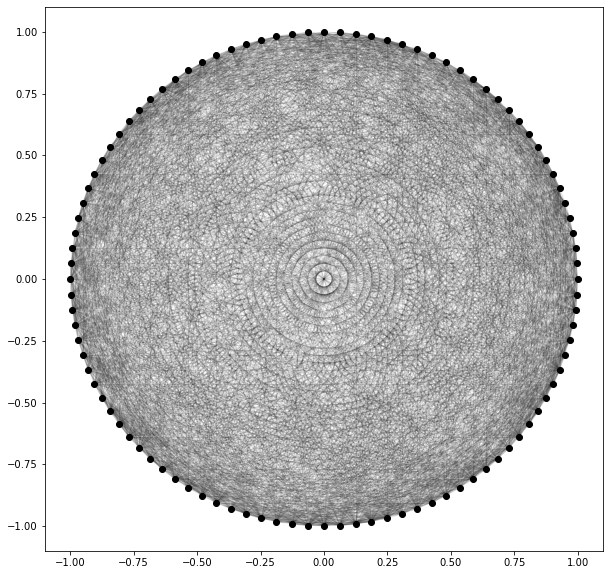

In [103]:
visualize(edges,alpha=.1)

In [104]:
degs = node_degree(edges)
print(degs)
max_color = np.max(degs)
print(max_color)

[48, 41, 46, 56, 61, 52, 48, 42, 52, 58, 47, 56, 60, 47, 49, 59, 55, 50, 54, 46, 54, 55, 49, 51, 41, 46, 55, 54, 49, 53, 53, 61, 51, 52, 55, 47, 51, 44, 46, 53, 59, 50, 52, 50, 46, 49, 49, 52, 53, 47, 54, 52, 48, 47, 57, 54, 42, 54, 42, 57, 53, 42, 51, 44, 52, 51, 58, 39, 46, 47, 40, 47, 55, 61, 46, 43, 51, 51, 48, 48, 47, 53, 49, 56, 37, 47, 51, 48, 54, 51, 52, 47, 60, 53, 45, 41, 46, 48, 43]
61


In [105]:
max_color

61

## Modelling

In [157]:
model = cp_model.CpModel()


# variables
max_color = 15
colors = [model.NewIntVar(0,int(max_color),f'c_{i}') for i in range(node_count)]
# colors = [model.NewIntVar(0,int(17),f'c_{i}') for i in range(node_count)]

# c_i =/= c_j
for n1,n2 in edges:
    model.Add(colors[n1]!=colors[n2])

In [158]:
model.Minimize(max(*colors))

In [159]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 30.0
status = solver.Solve(model)

In [160]:
res = [solver.Value(c) for c in colors]

print(*res)
print(max(*res)+1)
print([res.count(i) for i in np.unique(res)])

12 4 4 11 10 1 8 11 0 4 12 8 9 0 9 2 7 3 15 12 5 8 14 3 10 13 6 8 12 14 9 9 13 5 11 13 8 1 5 15 2 15 2 6 6 7 7 7 12 11 6 2 9 1 0 14 4 13 3 15 0 5 12 8 14 4 1 7 11 0 0 6 12 10 3 0 1 2 1 1 2 3 4 5 15 3 6 7 8 9 9 14 10 11 4 12 4 13 14 0
16
[8, 7, 6, 6, 8, 5, 6, 6, 7, 7, 4, 6, 8, 5, 6, 5]


In [110]:
check_results(edges,res)

[All good!]


True

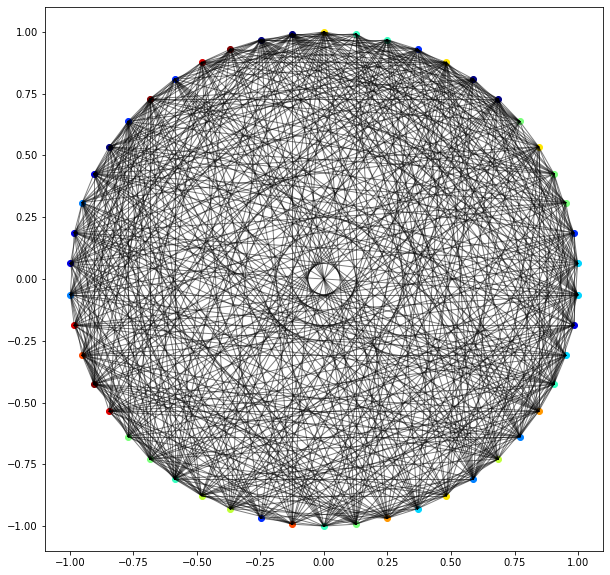

In [18]:
visualize(edges,colors=res)

In [19]:
cp_model.UNKNOWN, cp_model.FIXED_SEARCH,cp_model.FEASIBLE, cp_model.INFEASIBLE,cp_model.OPTIMAL

(0, 1, 2, 3, 4)

## Final Function

In [ ]:
def stepwise_opt(edges,node_count):
    print(f'*** Finding Solution for {node_count} Nodes',flush=True)
    n_colors,colors = color_graph(edges,node_count)
    print(f'Found solution for {n_colors} colors',flush=True)
    while n_colors is not None:
        print(f'\tTrying {n_colors-1} colors',flush=True)
        n_colors_prev, colors_prev = n_colors, colors
        max_color = n_colors-1
        n_colors,colors = color_graph(edges,node_count,max_color=max_color-1)
    return n_colors_prev, colors_prev

def color_graph(edges, node_count, max_color=None,max_time = None):
    if max_color is None:
        degs = node_degree(edges)
        max_color = np.max(degs)
        
    if max_time is None:
        max_time = max_time_calc(edges,node_count)
    # Create model
    model = cp_model.CpModel()
    
    # Define Variable
    colors = [model.NewIntVar(0,int(max_color),f'c_{i}') for i in range(node_count)]
    
    # Define Constraints
    for n1,n2 in edges:
        model.Add(colors[n1]!=colors[n2])
        
    # Define Objective
    model.Minimize(max(*colors))
    
    # Create Solver
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = max_time
    status = solver.Solve(model)
    
    if status == cp_model.FEASIBLE or status==cp_model.OPTIMAL:
        res = [solver.Value(c) for c in colors]
        n_colors = max(*res)+1
        return n_colors, res
    else:
        return None,[]

def max_time_calc(edges,node_count):
    pct = len(edges)/node_count**2
    t = node_count/1000*10 # using 10 sec for 1000 nodes as base
    t = t*pct/.05 # scale based on percentage of complete graph
    return max(10,t*2)

In [351]:
node_count, edge_count, edges = from_file(11)

File: gc_20_3
Nodes: 20
Edges: 63


In [353]:
color_graph(edges,node_count,max_time=120)

(6, [0, 3, 4, 1, 1, 0, 2, 2, 0, 3, 2, 5, 4, 4, 0, 3, 1, 0, 5, 0])

In [354]:
stepwise_opt(edges,node_count)

*** Finding Solution for 20 Nodes
Found solution for 6 colors
	Trying 5 colors
	Trying 4 colors


(5, [0, 3, 4, 1, 4, 0, 2, 3, 0, 2, 3, 1, 0, 3, 0, 2, 1, 0, 1, 0])

# Constraint Programing - matrix notation

In [6]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [1]:
from ortools.sat.python import cp_model
from ortools.sat.python import 
from ortools.constraint_solver import pywrapcp
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
def from_file(index):
    files = os.listdir('./data')
    with open(f'./data/{files[index]}', 'r') as fp:
        input_data = fp.read()
    lines = input_data.split('\n')

    first_line = lines[0].split()
    node_count = int(first_line[0])
    edge_count = int(first_line[1])

    edges = []
    for i in range(1, edge_count + 1):
        line = lines[i]
        parts = line.split()
        edges.append((int(parts[0]), int(parts[1])))

    print(f'File: {files[index]}')
    print(f'Nodes: {node_count}')
    print(f'Edges: {edge_count}')
    return node_count, edge_count, edges


def node_degree(edges, n_nodes=None):
    occur = np.array(edges).flatten()
    if n_nodes is None:
        n_nodes = occur.max()
    return [len(occur[occur == o]) for o in range(n_nodes)]


def visualize(edges, n_nodes=None, colors=None, random_seed=1, mode=0,alpha = 0.5):
    np.random.seed(random_seed)
    plt.figure(figsize=(10, 10))
    if n_nodes is None:
        n_nodes = np.array(edges).max() + 1

    if mode == 0:
        t = np.linspace(0, 1, n_nodes + 1) * 2 * np.pi
        coords = np.c_[np.sin(t[:-1]), np.cos(t[:-1])]
    elif mode == 1:
        coords = np.random.rand(n_nodes, 2)
    else:
        raise (ValueError('Unsupported mode.'))

    if colors is not None:
        cmap = cm.get_cmap('jet', len(np.unique(colors)))
        colors = np.array(colors)
        for c in np.unique(colors):
            plt.scatter(coords[colors == c, 0],
                        coords[colors == c, 1],
                        marker='o',
                        color=cmap(c))
    else:
        plt.scatter(coords[:, 0], coords[:, 1], marker='o', c='black')
    for n1, n2 in edges:
        xs = coords[[n1, n2], 0]
        ys = coords[[n1, n2], 1]
        plt.plot(xs, ys, color='black', linewidth=1, alpha=alpha)
        
def check_results(edges,colors):
    n_err = 0
    for n1,n2 in edges:
        if colors[n1]==colors[n2]:
            nerr +=1
            print(f'Error ditected: Nodes {n1} and {n2} were assigned the same color code ({color[n1]}).')
    if n_err>0:
        print(f'[{n_err} errors were found.]')
        return False
    else:
        print('[All good!]')
        return True

## Load file

In [111]:
node_count, edge_count, edges = from_file(7)

File: gc_100_5
Nodes: 100
Edges: 2502


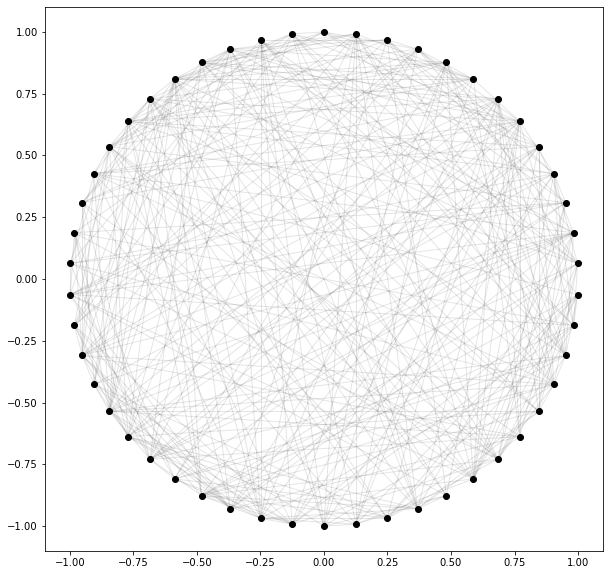

In [4]:
visualize(edges,alpha=.1)

In [112]:
degs = node_degree(edges)
print(degs)
max_color = np.max(degs)
print(max_color)

[48, 41, 46, 56, 61, 52, 48, 42, 52, 58, 47, 56, 60, 47, 49, 59, 55, 50, 54, 46, 54, 55, 49, 51, 41, 46, 55, 54, 49, 53, 53, 61, 51, 52, 55, 47, 51, 44, 46, 53, 59, 50, 52, 50, 46, 49, 49, 52, 53, 47, 54, 52, 48, 47, 57, 54, 42, 54, 42, 57, 53, 42, 51, 44, 52, 51, 58, 39, 46, 47, 40, 47, 55, 61, 46, 43, 51, 51, 48, 48, 47, 53, 49, 56, 37, 47, 51, 48, 54, 51, 52, 47, 60, 53, 45, 41, 46, 48, 43]
61


In [113]:
max_color

61

## Modelling

In [161]:
n_points = node_count
n_colors = max(degs)+1
n_colors = 16
# solver = pywrapcp.Solver('Colors')
model = cp_model.CpModel()

In [162]:
colors = [[model.NewBoolVar(f'x_{i}_{c}') for c in range(n_colors)] for i in range(n_points)]

In [163]:
# Connected edges
for i,j in edges:
    for c in range(n_colors):
        model.AddLinearConstraint(colors[i][c]+colors[j][c],0,1)
        
# Only one color
for i in range(n_points):
    model.AddLinearConstraint(sum(colors[i]),1,1)
    
# Breaking Symmetry
for c in range(n_colors-1):
    s1 = sum([colors[i][c] for i in range(n_points)])
    s2 = sum([colors[i][c+1] for i in range(n_points)])
    model.Add(s1>=s2)

In [164]:
# obj = 0
# for c in range(n_colors):
#     obj+=sum([colors[i][c]*c for i in range(n_points)])
# model.Minimize(obj)

## Solving

In [165]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 30.0
status = solver.Solve(model)

In [166]:
solver.StatusName(status)

'UNKNOWN'

In [167]:
# res = [solver.Value(c) for c in colors]
res = [[solver.Value(colors[i][c]) for c in range(n_colors)] for i in range(n_points)]
res = np.array(res)
# print(*res)
# print(max(*res)+1)
# print([res.count(i) for i in np.unique(res)])

IndexError: list index out of range

In [ ]:
sol = res@np.arange(res.shape[1])

In [ ]:
s = set(sol)
print(f'{len(s)}/{n_colors}',s,sep='\n')

In [132]:
check_results(edges,sol)

[All good!]


True

In [23]:
# mode = 1
# if mode ==0:
    
#     solver.Minimize(solver.Sum(colors),1)
# else:
#     max_colors = solver.IntVar(0,highest_order,'max_color')
#     solver.Add(colors[highest_order] < 1)
#     solver.MaxEquality(colors,max_colors)
#     solver.Minimize(max_colors,1)
# #     solver.Minimize(solver.Max(colors),1)

In [24]:
# solver.TimeLimit(5000)
db = solver.Phase(sum(colors,[]))#, solver.CHOOSE_FIRST_UNBOUND)
solver.NewSearch(db)

TypeError: Wrong number or type of arguments for overloaded function 'Solver_Phase'.
  Possible C/C++ prototypes are:
    operations_research::Solver::MakePhase(std::vector< operations_research::IntVar * > const &,operations_research::Solver::IntVarStrategy,operations_research::Solver::IntValueStrategy)
    operations_research::Solver::MakePhase(std::vector< operations_research::IntervalVar * > const &,operations_research::Solver::IntervalStrategy)
    operations_research::Solver::MakePhase(std::vector< operations_research::SequenceVar * > const &,operations_research::Solver::SequenceStrategy)


In [14]:
solver.NextSolution()

False

In [15]:
num_solutions = 0

if solver.NextSolution():
    res = [c.Value() for c in colors]

print(max(*res)+1)
print(*res)

NameError: name 'res' is not defined

In [ ]:
n_points = node_count
n_colors = max(orders)+1

solver = pywrapcp.Solver('Colors')

# colors = [solver.IntVar(0,n_points-1,f'c_{i}') for i in range(n_points)]
colors = [solver.IntVar(0,highest_order-1,f'c_{i}') for i in range(n_points)]
print(n_points,)



for i,j in edges:
    solver.Add(colors[i]!=colors[j])

# solver.Add(colors[highest_order] < 1)
# solver.

mode = 1
if mode ==0:
    
    solver.Minimize(solver.Sum(colors),1)
else:
    max_colors = solver.IntVar(0,highest_order,'max_color')
    solver.Add(colors[highest_order] < 1)
    solver.MaxEquality(colors,max_colors)
    solver.Minimize(max_colors,1)
#     solver.Minimize(solver.Max(colors),1)

# solver.TimeLimit(5000)
db = solver.Phase(colors,
                    solver.CHOOSE_FIRST_UNBOUND,
                    solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)


solver.NextSolution()

num_solutions = 0

if solver.NextSolution():
    res = [c.Value() for c in colors]

print(max(*res)+1)
print(*res)

In [14]:
model.Minimize(max(*colors))

In [15]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 30.0
status = solver.Solve(model)

In [16]:
res = [solver.Value(c) for c in colors]

print(*res)
print(max(*res)+1)
print([res.count(i) for i in np.unique(res)])

8 5 5 2 8 0 0 6 8 6 6 2 4 4 1 4 5 9 3 7 3 8 4 9 6 5 10 2 7 7 5 6 6 11 12 10 11 3 1 1 3 1 0 2 12 2 11 12 0 0
13
[5, 4, 5, 4, 4, 5, 6, 3, 4, 2, 2, 3, 3]


In [ ]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

from ortools.sat.python import cp_model
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def from_file(index):
    files = os.listdir('./data')
    with open(f'./data/{files[index]}', 'r') as fp:
        input_data = fp.read()
    lines = input_data.split('\n')

    first_line = lines[0].split()
    node_count = int(first_line[0])
    edge_count = int(first_line[1])

    edges = []
    for i in range(1, edge_count + 1):
        line = lines[i]
        parts = line.split()
        edges.append((int(parts[0]), int(parts[1])))

    print(f'File: {files[index]}')
    print(f'Nodes: {node_count}')
    print(f'Edges: {edge_count}')
    return node_count, edge_count, edges


def node_degree(edges, n_nodes=None):
    occur = np.array(edges).flatten()
    if n_nodes is None:
        n_nodes = occur.max()
    return [len(occur[occur == o]) for o in range(n_nodes)]


def visualize(edges, n_nodes=None, colors=None, random_seed=1, mode=0,alpha = 0.5):
    np.random.seed(random_seed)
    plt.figure(figsize=(10, 10))
    if n_nodes is None:
        n_nodes = np.array(edges).max() + 1

    if mode == 0:
        t = np.linspace(0, 1, n_nodes + 1) * 2 * np.pi
        coords = np.c_[np.sin(t[:-1]), np.cos(t[:-1])]
    elif mode == 1:
        coords = np.random.rand(n_nodes, 2)
    else:
        raise (ValueError('Unsupported mode.'))

    if colors is not None:
        cmap = cm.get_cmap('jet', len(np.unique(colors)))
        colors = np.array(colors)
        for c in np.unique(colors):
            plt.scatter(coords[colors == c, 0],
                        coords[colors == c, 1],
                        marker='o',
                        color=cmap(c))
    else:
        plt.scatter(coords[:, 0], coords[:, 1], marker='o', c='black')
    for n1, n2 in edges:
        xs = coords[[n1, n2], 0]
        ys = coords[[n1, n2], 1]
        plt.plot(xs, ys, color='black', linewidth=1, alpha=alpha)
        
def check_results(edges,colors):
    n_err = 0
    for n1,n2 in edges:
        if colors[n1]==colors[n2]:
            nerr +=1
            print(f'Error ditected: Nodes {n1} and {n2} were assigned the same color code ({color[n1]}).')
    if n_err>0:
        print(f'[{n_err} errors were found.]')
        return False
    else:
        print('[All good!]')
        return True

## Load file

node_count, edge_count, edges = from_file(28)

visualize(edges,alpha=.1)

degs = node_degree(edges)
print(degs)
max_color = np.max(degs)
print(max_color)

max_color

## Modelling

model = cp_model.CpModel()


# variables
max_color = 12
colors = [model.NewIntVar(0,int(max_color),f'c_{i}') for i in range(node_count)]
# colors = [model.NewIntVar(0,int(17),f'c_{i}') for i in range(node_count)]

# c_i =/= c_j
for n1,n2 in edges:
    model.Add(colors[n1]!=colors[n2])

model.Minimize(max(*colors))

solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 30.0
status = solver.Solve(model)

res = [solver.Value(c) for c in colors]

print(*res)
print(max(*res)+1)
print([res.count(i) for i in np.unique(res)])

# Naive Search

In [1]:
from ortools.sat.python import cp_model
import numpy as np
import os

In [2]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [11]:
idx = 5
print(files[idx])
with open(f'./data/{files[idx]}','r') as fp:
    input_data = fp.read()
print(input_data[:15])

gc_100_1
100 482
0 4
0 3


In [12]:
lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))
    
print(node_count, edge_count)

100 482


In [13]:
edge_array = np.array(edges)
orders = [np.sum(edge_array==i) for i in range(node_count)]
highest_order = int(np.argmax(orders))
print(highest_order,orders[highest_order] )

80 16


In [14]:
solver = cp_model.CpSolver()
model = cp_model.CpModel()

max_color = highest_order

c = [model.NewIntVar(0, max_color, "i%i" % i) for i in range(0, node_count)]

for i in range(len(edges)):
    model.Add(c[edges[i][0]] != c[edges[i][1]])

model.Minimize(max([c[i] for i in range(0, node_count)]))  
 
status = solver.Solve(model)
print(status)
solution = [solver.Value(c[i]) for i in range(0, node_count)]

output_data = str(max(solution)+1) + ' ' + str(solver.StatusName(status)) + '\n'
output_data += ' '.join(map(str, solution))
print(output_data)

4
6 OPTIMAL
1 1 5 4 3 2 1 2 5 1 3 2 1 2 3 4 0 1 3 2 0 0 3 0 1 4 4 2 1 1 4 2 5 1 2 0 5 1 4 0 0 5 0 2 3 2 1 0 0 4 1 2 0 1 1 4 3 0 2 0 3 2 5 0 2 0 1 2 2 4 0 0 2 1 4 1 1 0 1 0 3 3 0 3 1 2 3 3 4 1 5 5 2 5 2 4 4 1 0 0
